# Agglomerative Hierarchical Clustering
## for Car Dataset using scipy lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Car Dataset

In [2]:
car_df = pd.read_csv('../data/cars_clus.csv')
car_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### Anaylizing the Data

In [3]:
car_df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

on seeing the unique values from each rows we find that there are few null values
#### lets take few features for clustering

In [4]:
feature_list = car_df.columns[6:14].tolist()
print(feature_list)

['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']


In [5]:
my_df = car_df[feature_list]
my_df.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000
1,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000
2,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000
3,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000
4,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000


converting to int

In [6]:
my_df = my_df.apply(pd.to_numeric, errors='coerce')
my_df = my_df.dropna()
my_df.dtypes

engine_s    float64
horsepow    float64
wheelbas    float64
width       float64
length      float64
curb_wgt    float64
fuel_cap    float64
mpg         float64
dtype: object

### Normalizing Dataset to 0 - 1

In [7]:
from sklearn import preprocessing

x = preprocessing.MinMaxScaler().fit(my_df).transform(my_df)
x[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.2716763 , 0.30625832,
        0.20233886, 0.13364055, 0.41935484],
       [0.31428571, 0.43037975, 0.3362256 , 0.44508671, 0.5792277 ,
        0.44112048, 0.31797235, 0.32258065],
       [0.31428571, 0.43037975, 0.31019523, 0.46242775, 0.56724368,
        0.42833832, 0.31797235, 0.35483871],
       [0.35714286, 0.39240506, 0.47722343, 0.50867052, 0.62849534,
        0.53168344, 0.35483871, 0.22580645],
       [0.11428571, 0.24050633, 0.21691974, 0.32369942, 0.38082557,
        0.2999728 , 0.28110599, 0.38709677]])

### Training Agglomerative Clustering using Scipy

#### Distance Matrix

In [8]:
import scipy
n = len(x) # Number of rows
dist_mat = np.zeros([n, n])

for i in range(n):
    for j in range(n):
        dist_mat[i, j] = scipy.spatial.distance.euclidean(x[i], x[j])

#### Creating Clusters

In [9]:
from scipy import cluster
linkage = 'complete'

Z = cluster.hierarchy.linkage(dist_mat, method=linkage)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


Clustering

In [10]:
from scipy.cluster.hierarchy import fcluster

k = 9
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 1, 1, 1, 4, 2, 9, 4, 4, 1, 1, 1, 2, 2, 2, 2, 1, 7, 3, 4, 1, 1,
       1, 2, 3, 6, 1, 4, 4, 2, 4, 2, 2, 3, 4, 4, 7, 7, 8, 7, 9, 9, 2, 3,
       1, 4, 1, 3, 9, 2, 9, 8, 1, 7, 3, 4, 4, 1, 2, 5, 3, 4, 1, 1, 5, 4,
       1, 1, 1, 2, 2, 8, 1, 2, 9, 7, 3, 4, 4, 1, 1, 2, 4, 4, 4, 1, 9, 2,
       2, 4, 1, 9, 2, 3, 3, 4, 9, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 2, 1, 2,
       3, 4, 2, 2, 4, 4, 1, 1, 2, 2, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 1, 3, 3, 2, 3, 4, 8, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 1, 1, 5,
       2], dtype=int32)

### Ploting Dendrogram

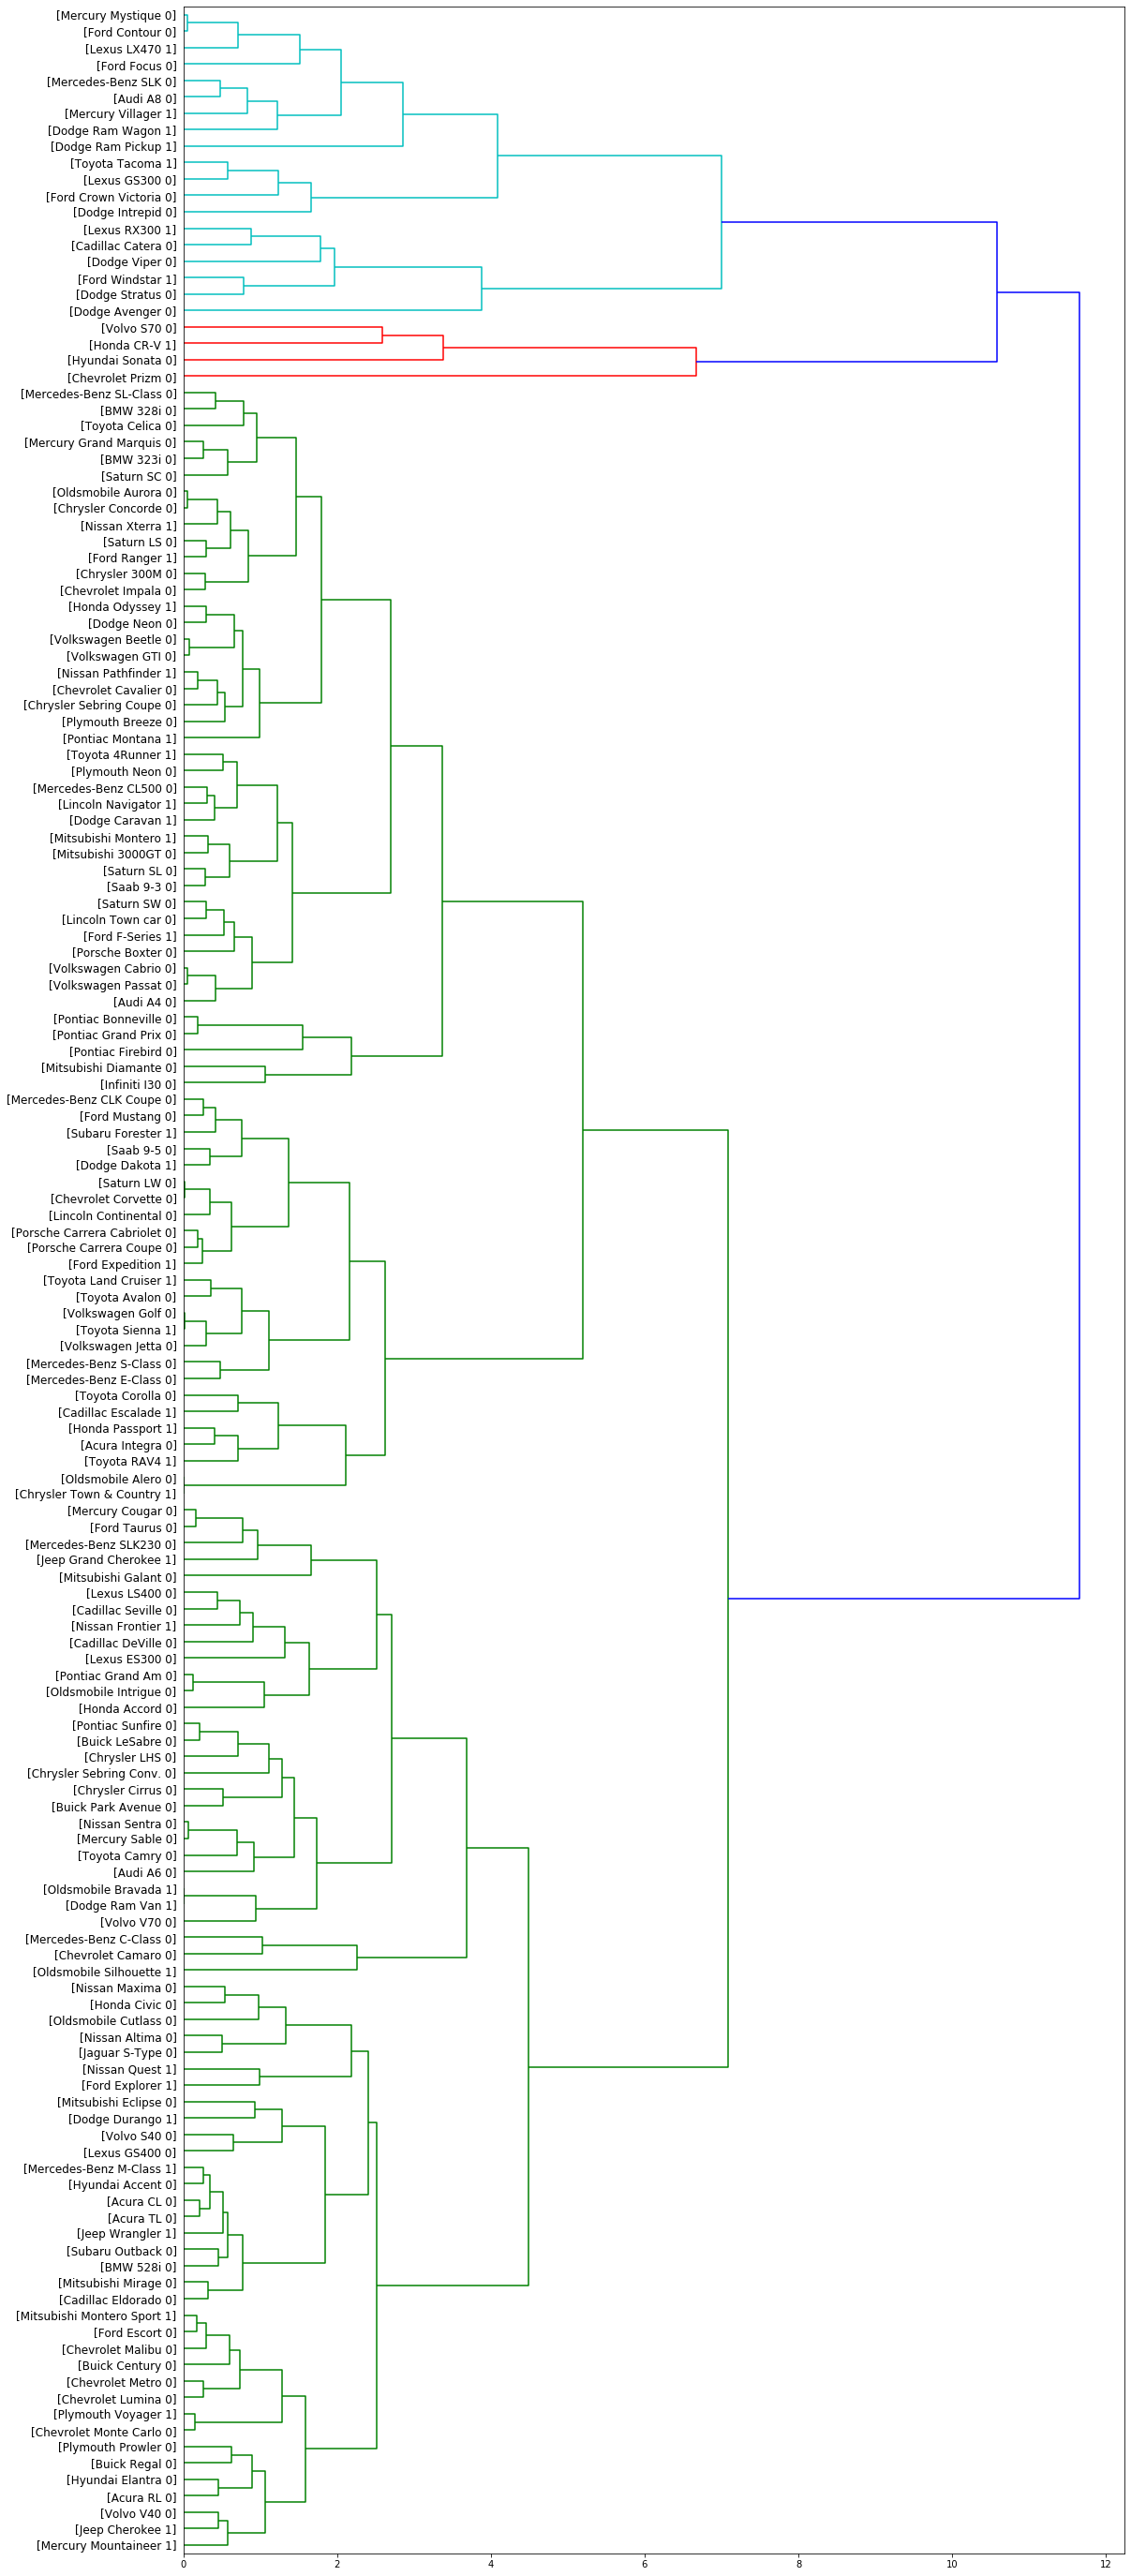

In [11]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (car_df['manufact'][id], car_df['model'][id], int(float(car_df['type'][id])) )
    
dendro = cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')